In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("DATA/Advertising.csv", index_col=0)

In [3]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [5]:
df.shape

(200, 4)

In [6]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [7]:
X = df[["TV", "radio", "newspaper"]]
y = df["sales"]

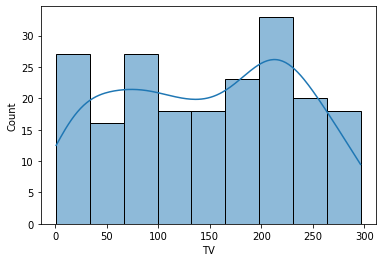

In [8]:
# Plot histogram
sns.histplot(data = df, x = "TV", kde = True)
plt.show()

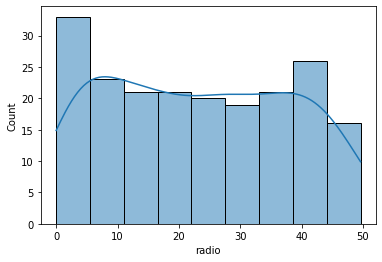

In [9]:
sns.histplot(data = df, x = "radio", kde = True)
plt.show()

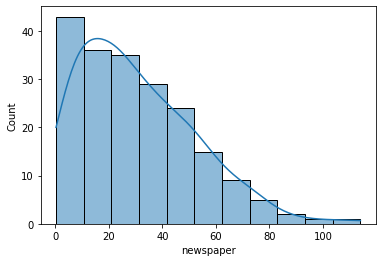

In [10]:
sns.histplot(data = df, x = "newspaper", kde = True)
plt.show()

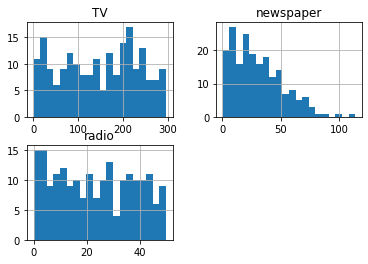

In [11]:
X.hist(bins = 20)
plt.show()

In [12]:
# Splitting data in to train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10)

In [13]:
# predicting using the KNeighbors_Classifier

from sklearn.neighbors import KNeighborsRegressor
model_KNN = KNeighborsRegressor(n_neighbors=3, metric = "euclidean")

#fitting the model on teh data and predict the values
model_KNN.fit(X_train, y_train)

y_pred = model_KNN.predict(X_test)

In [18]:
import joblib

# Save model on disk
joblib.dump(model_KNN, "trained_KNN_model.pkl")

['trained_KNN_model.pkl']

In [19]:
# load model on disk
model = joblib.load("trained_KNN_model.pkl")

In [15]:
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(r2)
print(mse)

0.925958613863326
2.778240740740741


In [20]:
min(y_test), max(y_test)

(1.6, 27.0)

In [21]:
acc_dict = dict()

for K in range(1,31):
    
    # for create object with k value
    model_KNN = KNeighborsRegressor(n_neighbors=K, metric="euclidean")
    
    # model fit
    model_KNN.fit(X_train, y_train)
    
    # model prediction
    y_pred = model_KNN.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    
    # print accuracy score
    print("Accuracy is: {} for K-Value: {}".format(r2,K))
    acc_dict[K] = r2

Accuracy is: 0.9383841428002567 for K-Value: 1
Accuracy is: 0.9182264031854402 for K-Value: 2
Accuracy is: 0.925958613863326 for K-Value: 3
Accuracy is: 0.932788657210048 for K-Value: 4
Accuracy is: 0.9149539491202795 for K-Value: 5
Accuracy is: 0.8929665815850817 for K-Value: 6
Accuracy is: 0.8744848671701098 for K-Value: 7
Accuracy is: 0.8654478098543175 for K-Value: 8
Accuracy is: 0.8492939672848692 for K-Value: 9
Accuracy is: 0.8402713283054284 for K-Value: 10
Accuracy is: 0.8371675782423147 for K-Value: 11
Accuracy is: 0.8373829505130865 for K-Value: 12
Accuracy is: 0.8276548833014651 for K-Value: 13
Accuracy is: 0.8283131539137829 for K-Value: 14
Accuracy is: 0.8161422263836416 for K-Value: 15
Accuracy is: 0.8004112554208694 for K-Value: 16
Accuracy is: 0.7942012190658417 for K-Value: 17
Accuracy is: 0.7802634154775825 for K-Value: 18
Accuracy is: 0.7676471516517576 for K-Value: 19
Accuracy is: 0.7573316851506093 for K-Value: 20
Accuracy is: 0.7503499480255902 for K-Value: 21
Acc